In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from keras.applications import ResNet50
from keras.optimizers import Adam
from tensorflow.keras.layers import Input, Concatenate

In [2]:
dataset_path = "./DatasetV03"

In [3]:
class_directories = [os.path.join(dataset_path, name) for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]
class_image_counts = {os.path.basename(directory): len(os.listdir(directory)) for directory in class_directories}

In [4]:
class_directories

['./DatasetV03\\1. No DR signs',
 './DatasetV03\\2. Mild (or early) NPDR',
 './DatasetV03\\3. Moderate NPDR',
 './DatasetV03\\4. Severe NPDR',
 './DatasetV03\\5. Very Severe NPDR',
 './DatasetV03\\6. PDR',
 './DatasetV03\\7. Advanced PDR']

In [5]:
print("Class distribution before sampling:")
class_image_counts

Class distribution before sampling:


{'1. No DR signs': 711,
 '2. Mild (or early) NPDR': 6,
 '3. Moderate NPDR': 110,
 '4. Severe NPDR': 210,
 '5. Very Severe NPDR': 139,
 '6. PDR': 116,
 '7. Advanced PDR': 145}

In [6]:
image_paths = []
for class_dir in class_directories:
    file_list = os.listdir(class_dir)
    for file in file_list:
        image_path = os.path.join(class_dir, file)
        image_paths.append(image_path)
image_paths

['./DatasetV03\\1. No DR signs\\1.jpg',
 './DatasetV03\\1. No DR signs\\10.jpg',
 './DatasetV03\\1. No DR signs\\100.jpg',
 './DatasetV03\\1. No DR signs\\101.jpg',
 './DatasetV03\\1. No DR signs\\102.jpg',
 './DatasetV03\\1. No DR signs\\103.jpg',
 './DatasetV03\\1. No DR signs\\104.jpg',
 './DatasetV03\\1. No DR signs\\105.jpg',
 './DatasetV03\\1. No DR signs\\106.jpg',
 './DatasetV03\\1. No DR signs\\107.jpg',
 './DatasetV03\\1. No DR signs\\108.jpg',
 './DatasetV03\\1. No DR signs\\109.jpg',
 './DatasetV03\\1. No DR signs\\11.jpg',
 './DatasetV03\\1. No DR signs\\110.jpg',
 './DatasetV03\\1. No DR signs\\111.jpg',
 './DatasetV03\\1. No DR signs\\112.jpg',
 './DatasetV03\\1. No DR signs\\113.jpg',
 './DatasetV03\\1. No DR signs\\114.jpg',
 './DatasetV03\\1. No DR signs\\115.jpg',
 './DatasetV03\\1. No DR signs\\116.jpg',
 './DatasetV03\\1. No DR signs\\117.jpg',
 './DatasetV03\\1. No DR signs\\118.jpg',
 './DatasetV03\\1. No DR signs\\119.jpg',
 './DatasetV03\\1. No DR signs\\12.jpg

In [7]:
image_data = []
labels = []
image_size = (224,224)
for image_path in image_paths:
    image = cv2.imread(image_path)
    image = cv2.resize(image, image_size)
    image_data.append(image)
image_data

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [8]:
image_paths[827]

'./DatasetV03\\4. Severe NPDR\\1000.jpg'

In [9]:
image_data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [10]:
len(image_data)

1437

In [11]:
label_path = os.path.join(dataset_path, os.listdir(dataset_path)[-1])
labels = pd.read_excel(label_path)
labels = list(labels["Status"])
labels

['No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR signs',
 'No DR 

In [12]:
len(labels)

1437

In [13]:
index = [0]
for i in list(class_image_counts.values()):
    index.append(index[-1]+i)
index.pop()
index

[0, 711, 717, 827, 1037, 1176, 1292]

In [14]:
class_names = []
for i in range(len(index)):
    print(labels[index[i]])
    class_names.append(labels[index[i]])

No DR signs
Mild (or early) NPDR
Moderate NPDR
Severe NPDR
Very Severe NPDR
PDR
Advanced PDR


Original images

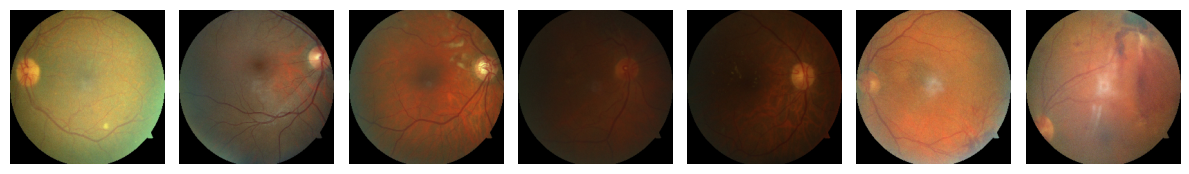

In [15]:
fig, axes = plt.subplots(1, 7, figsize=(12, 4))

# Loop through the images and plot them
for i in range(len(index)):
    # Read the image using OpenCV (replace with your image loading code)
    plt.subplot(1,7,i+1)

    # Convert BGR to RGB (if needed)
    image = cv2.cvtColor(image_data[index[i]], cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.imshow(image)
    
    # Remove axis labels and ticks
    plt.axis("off")

# Adjust layout to prevent clipping of axis labels
plt.tight_layout()

Preprocessing

In [16]:
def blur_image_median(image, kernel_size=5):
    blurred_image = cv2.medianBlur(image, kernel_size)
    return blurred_image

def detect_edges_sobel(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Sobel edge detection
    sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Combine horizontal and vertical edge images
    edge_image = cv2.magnitude(sobelx, sobely)
    
    _, binary_edge_image = cv2.threshold(edge_image, 20, 255, cv2.THRESH_BINARY)
    
    return binary_edge_image

In [17]:
image_pre = []
for image in image_data:
    blurred = blur_image_median(image)
    edge_det = detect_edges_sobel(blurred)
    expanded_image = np.stack([edge_det] * 3, axis=-1)
    image_pre.append(expanded_image)
len(image_pre)

1437

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


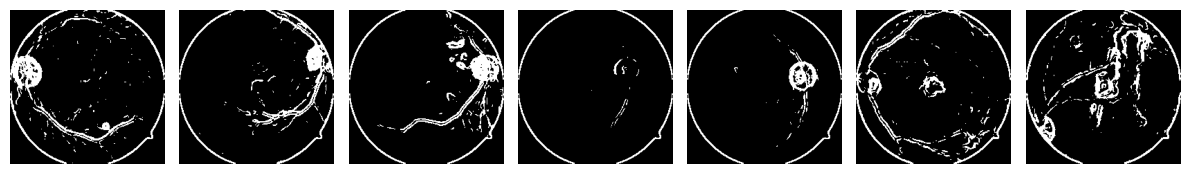

In [18]:
fig, axes = plt.subplots(1, 7, figsize=(12, 4))

# Loop through the images and plot them
for i in range(len(index)):
    # Read the image using OpenCV (replace with your image loading code)
    plt.subplot(1,7,i+1)

    # Convert BGR to RGB (if needed)
    image = image_pre[index[i]]
    
    # Display the image
    plt.imshow(image, cmap="gray")
    
    # Remove axis labels and ticks
    plt.axis("off")

# Adjust layout to prevent clipping of axis labels
plt.tight_layout()

In [19]:
image_data = image_pre

Rotate

In [20]:
def rotate (image, angle):
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

Flip

In [21]:
def flip (image):
    flipped_horizontal = cv2.flip(image, 1)
    return flipped_horizontal

Shift

In [22]:
def shift (image, shift_x, shift_y):
    rows, cols = image.shape[:2]
    shift_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]]) # Shift x,y
    shifted_image = cv2.warpAffine(image, shift_matrix, (cols, rows))
    return shifted_image

Augmentation for "Mild" class

In [23]:
mild_aug = []
for image in image_data[index[1]:index[2]]:
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for i in range(10,360,10):
        mild_aug.append(rotate(image, i))
    mild_aug.append(flip(image))
    flipped_image = flip(image)
    for i in range(10,360,20):
        mild_aug.append(rotate(flipped_image, i))   
    for i in range(-4, 5):
        for j in range(-4, 5):
            if i != 0 and j != 0:
                mild_aug.append(shift(image, i, j))

In [24]:
len(mild_aug)

708

In [25]:
mild_labels = [labels[index[1]]]*len(mild_aug)
print(mild_labels[0])
len(mild_labels)

Mild (or early) NPDR


708

Augmentation for "Moderate" class

In [26]:
mod_aug = []
count = 0
for image in image_data[index[2]:index[3]]:
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mod_aug.append(rotate(image, 90))
    mod_aug.append(rotate(image, 270))
    if count % 2 == 0:
        mod_aug.append(rotate(image, 180))
    mod_aug.append(flip(image))
    flipped_image = flip(image)
    mod_aug.append(rotate(flipped_image, 90))   
    mod_aug.append(rotate(flipped_image, 270))
    count += 1

In [27]:
len(mod_aug)

605

In [28]:
mod_labels = [labels[index[2]]]*len(mod_aug)
print(mod_labels[0])
len(mod_labels)

Moderate NPDR


605

Augmentation for "Severe" class

In [29]:
sev_aug = []
count = 0
for image in image_data[index[3]:index[4]]:
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    sev_aug.append(rotate(image, 180))
    sev_aug.append(flip(image))
    flipped_image = flip(image)
    if count % 2 == 0:
        sev_aug.append(rotate(flipped_image, 180))
    count += 1

In [30]:
len(sev_aug)

525

In [31]:
sev_labels = [labels[index[3]]]*len(sev_aug)
print(sev_labels[0])
len(sev_labels)

Severe NPDR


525

Augmentation for "Very severe" class

In [32]:
very_aug = []
for image in image_data[index[4]:index[5]]:
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    very_aug.append(rotate(image, 90))
    very_aug.append(rotate(image, 270))
    very_aug.append(flip(image))
    flipped_image = flip(image)
    very_aug.append(rotate(flipped_image, 180))

In [33]:
len(very_aug)

556

In [34]:
very_labels = [labels[index[4]]]*len(very_aug)
print(very_labels[0])
len(very_labels)

Very Severe NPDR


556

Augmentation for "PDR" class

In [35]:
pdr_aug = []
for image in image_data[index[5]:index[6]]:
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pdr_aug.append(rotate(image, 90))
    pdr_aug.append(rotate(image, 270))
    pdr_aug.append(flip(image))
    flipped_image = flip(image)
    pdr_aug.append(rotate(flipped_image, 90))
    pdr_aug.append(rotate(flipped_image, 270))

In [36]:
len(pdr_aug)

580

In [37]:
pdr_labels = [labels[index[5]]]*len(pdr_aug)
print(pdr_labels[0])
len(pdr_labels)

PDR


580

Augmentation for "Advanced" class

In [38]:
adv_aug = []
for image in image_data[index[6]:len(labels)]:
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    adv_aug.append(rotate(image, 90))
    adv_aug.append(rotate(image, 270))
    adv_aug.append(flip(image))
    flipped_image = flip(image)
    adv_aug.append(rotate(flipped_image, 180))

In [39]:
len(adv_aug)

580

In [40]:
adv_labels = [labels[index[6]]]*len(adv_aug)
print(adv_labels[0])
len(adv_labels)

Advanced PDR


580

Add to the original dataset

In [41]:
image_data_new = image_data + mild_aug + mod_aug + sev_aug + very_aug + pdr_aug + adv_aug

In [42]:
len(image_data_new)

4991

In [43]:
labels_new = labels + mild_labels + mod_labels + sev_labels + very_labels + pdr_labels + adv_labels

In [44]:
len(labels_new)

4991

Shuffle and split data

In [45]:
def encoder (labels):
    encoded_labels = []
    for label in labels:
        encoded_labels.append(class_names.index(label))
    return encoded_labels

In [46]:
x_train, x_test, y_train, y_test = train_test_split(image_data_new, labels_new, test_size=0.2, random_state=10)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=10)
x_train = np.array(x_train)
x_val = np.array(x_val)
x_train = x_train/255.0
x_val = x_val/255.0
y_train = np.array(encoder(y_train))
y_val = np.array(encoder(y_val))
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [47]:
print(len(x_train), len(x_val), len(x_test))

2994 998 999


In [48]:
print(len(y_train), len(y_val), len(y_test))

2994 998 999


In [49]:
num_classes = len(index)

Classification model

In [50]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # num_classes is the number of classes in your dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
checkpoint_callback = ModelCheckpoint(filepath='best_classsify.h5', 
                                      monitor='val_accuracy', 
                                      save_best_only=True,
                                      verbose=1, 
                                      save_weights_only=False)
csv_logger = CSVLogger('training_log.csv')
early_stopping_callback = EarlyStopping(monitor='val_accuracy', 
                                        patience=8, 
                                        verbose=1)

model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val), callbacks=[checkpoint_callback, csv_logger, early_stopping_callback])

Epoch 1/200
94/94 [==============================] - ETA: 0s - loss: 0.2024 - accuracy: 0.9252
Epoch 1: val_accuracy improved from -inf to 0.14128, saving model to best_classsify.h5
94/94 [==============================] - 14s 142ms/step - loss: 0.2024 - accuracy: 0.9252 - val_loss: 4.2621 - val_accuracy: 0.1413
Epoch 2/200
94/94 [==============================] - ETA: 0s - loss: 0.1161 - accuracy: 0.9552
Epoch 2: val_accuracy improved from 0.14128 to 0.14729, saving model to best_classsify.h5
94/94 [==============================] - 13s 137ms/step - loss: 0.1161 - accuracy: 0.9552 - val_loss: 3.8411 - val_accuracy: 0.1473
Epoch 3/200
94/94 [==============================] - ETA: 0s - loss: 0.1003 - accuracy: 0.9636
Epoch 3: val_accuracy improved from 0.14729 to 0.22545, saving model to best_classsify.h5
94/94 [==============================] - 13s 137ms/step - loss: 0.1003 - accuracy: 0.9636 - val_loss: 3.0816 - val_accuracy: 0.2255
Epoch 4/200
94/94 [==============================] -

In [54]:
x_test = np.array(x_test)
x_test = x_test/255.0

In [55]:
y_test = encoder(y_test)
y_test = np.array(y_test)

In [56]:
np.save('x_test', x_test)

In [57]:
np.save('y_test', y_test)